In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('notebook')
from matplotlib import style
style.use('dark_background')

In [84]:
df = pd.read_csv('loan_data.csv')

In [88]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [89]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [90]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [91]:
df["purpose"] = df["purpose"].astype('category')
df.dtypes

credit.policy           int64
purpose              category
int.rate              float64
installment           float64
log.annual.inc        float64
dti                   float64
fico                    int64
days.with.cr.line     float64
revol.bal               int64
revol.util            float64
inq.last.6mths          int64
delinq.2yrs             int64
pub.rec                 int64
not.fully.paid          int64
dtype: object

In [92]:
df["purpose"] = df["purpose"].cat.codes
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


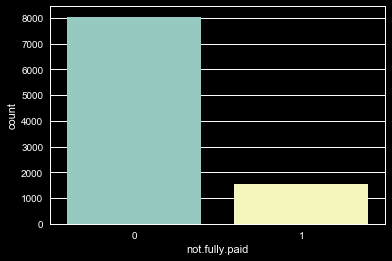

In [93]:
sns.countplot(df['not.fully.paid'])

In [ ]:
sns.distplot(df['installment'], bins=30, color='blue')

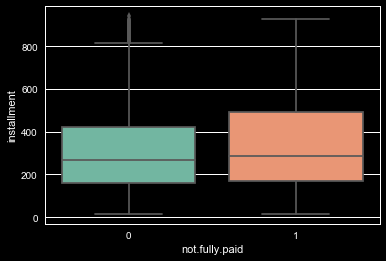

In [63]:
sns.boxplot(x='not.fully.paid', y='installment', data=df, palette='Set2')

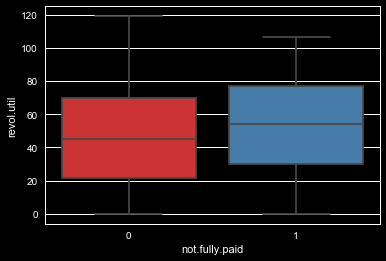

In [64]:
sns.boxplot(x='not.fully.paid', y='revol.util', data=df, palette='Set1')

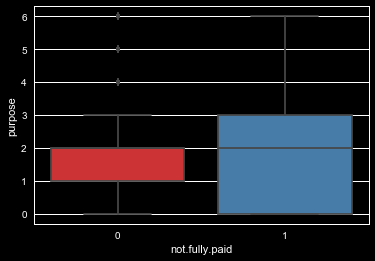

In [65]:
sns.boxplot(x='not.fully.paid', y='purpose', data=df, palette='Set1')

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dtree = DecisionTreeClassifier()

In [71]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
test_predict = dtree.predict(X_test)

In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test, test_predict))

             precision    recall  f1-score   support

          0       0.85      0.84      0.84      2012
          1       0.22      0.25      0.23       383

avg / total       0.75      0.74      0.75      2395



In [75]:
dtree.feature_importances_

array([ 0.02502687,  0.02659963,  0.12037663,  0.12741455,  0.10672823,
        0.10617722,  0.0615503 ,  0.10848895,  0.12706866,  0.13209416,
        0.03900155,  0.00967236,  0.00980087])

In [76]:
dtree.tree_.node_count

2207

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier(n_estimators=100)

In [79]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
test_predict = rf.predict(X_test)

In [81]:
print(classification_report(y_test, test_predict))

             precision    recall  f1-score   support

          0       0.84      0.99      0.91      2012
          1       0.33      0.02      0.03       383

avg / total       0.76      0.84      0.77      2395

